<a href="https://colab.research.google.com/github/likehs2/SocialMediaStatus/blob/main/Projeto_Avaliativo_Vinicius_Leonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Programa de Pós-graduação em Informática - PPGI UTFPR**
## **Disciplina de Linguagem de Programação**

###Professor: Dr. Lucas Dias Hiera Sampaio

####Alunos: Leonardo Garcia dos Santos e Vinicius Lopes Ferreira



##Objetivos:

● Geração de um Notebook no Colab para manipulação e processamento dos dados

● Leitura de arquivos texto disponíveis em repositórios públicos de dados ou em um repositório Github se a elaboração dos dados for parte do trabalho.

● Desenvolvimento de funções e/ou classes para organização e modularização do código

● Utilização do Pandas para manipulação dos dados que podem compreender tratamento de erros, inconsistências, transformações, validações, etc

● O script deve ser modular, tal que, as customizações possam ser configuradas no início
do script

● Análise dos dados gerando gráficos (pelo menos 2 gráficos diferentes)


##Nossa Proposta:
Comparação de preços de produtos agrícolas, e suas variações.
<br>Produtos escolhidos:


*   Café Arábica
*   Café Robusta(Conillon)
*   Arroz em Casca






###Observações:
Nosso código estará comentado com #Leonardo com as partes do Leonardo, e #Vinicius com suas partes.<br>
Para os dados do café, a extração de dados foi desenvolvida pelo Vinícius, e a geração de gráficos, pelo Leonardo.<br>
Já para os dados do arroz em casca, a extração foi desenvolvida pelo Leonardo, e a geração dos gráficos, pelo Vinícius. Contendo lógicas diferentes em cada desenvolvimento.

In [ ]:
#Vinicius
!pip install requests beautifulsoup4 pandas

In [ ]:
#Vinicius
from bs4 import BeautifulSoup
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

In [ ]:
#Vinicius
def extrair_dados_cafe(url): #Extrai e processa dados de cotações de café em uma pagina web
    headers = {'User-Agent': 'Mozilla/5.0'} #Define cabeçalho para simular o navegador e evitar bloqueios
    response = requests.get(url, headers=headers) #Faz requisições HTTP para receber o conteúdo da página
    soup = BeautifulSoup(response.text, 'html.parser')
    tabelas = soup.find_all('table', class_='cot-fisicas') #Busca todas as tabelas com classe 'cot-fisicas'

    lista_df = [] #Lista para armazenar DataFrames de cada tabela
    for tabela in tabelas:
        df = pd.read_html(StringIO(str(tabela)))[0] #Converte tabela HTML em DataFrame
        lista_df.append(df)

    df_cafe = pd.concat(lista_df, ignore_index=True) #Combina todos os DataFrames em um unico
    df_cafe['Valor R$'] = (
        df_cafe['Valor R$']
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
        .astype(float)
    ) #Trata a coluna 'Valor R$': removendo pontos e substituindo virgulas por ponto
    df_cafe['Variação(%)'] = (
        df_cafe['Variação(%)'].astype(str)
        .str.replace('%', '', regex=False)
        .str.replace(',', '.', regex=False)
        .str.replace('+', '', regex=False)
    ) #Trata a coluna 'Variação(%)': removendo '%' e substituindo virgulas por ponto, remove tambem '+' e converte para valor numerico
    df_cafe['Variação(%)'] = pd.to_numeric(df_cafe['Variação(%)'], errors='coerce')

    return df_cafe

In [ ]:
#Vinicius
urls = {
    'Arábica': 'https://www.noticiasagricolas.com.br/cotacoes/cafe/indicador-cepea-esalq-cafe-arabica',
    'Robusta': 'https://www.noticiasagricolas.com.br/cotacoes/cafe/indicador-cepea-esalq-cafe-conillon',
} #Armazena URL´s de cada tipo de café

dados_por_origem = {} #Inicializa dicionário
df_total = pd.DataFrame() #Inicializa DataFrame
for nome, url in urls.items():
    df = extrair_dados_cafe(url) #Extrai dados da URL
    df['Origem'] = nome #Adiciona a coluna 'Origem' com o tipo de café
    dados_por_origem[nome] = df #Armazena o DataFrame no dicionario

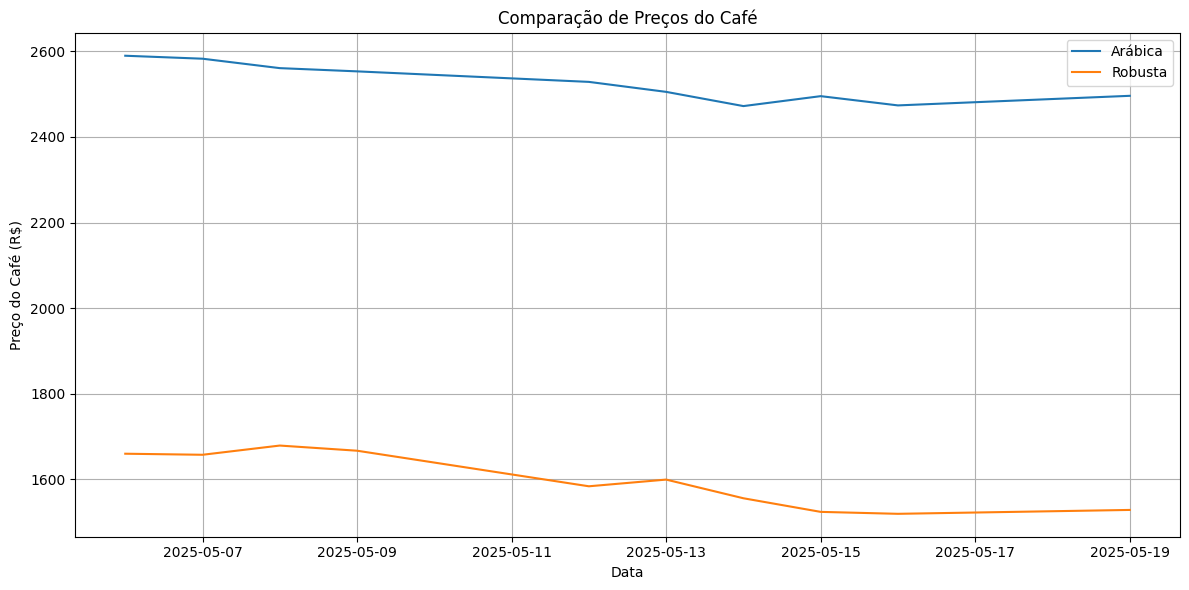

In [ ]:
#Leonardo
df_comparado = pd.concat(dados_por_origem.values(), ignore_index=True) #Junta os DataFrames do dicionário dados_por_origem
df_comparado['Data'] = pd.to_datetime(df_comparado['Data'], dayfirst=True) #Converte a coluna Data para datetime, apresentando o dia primeiro
plt.figure(figsize=(12, 6)) #Define o tamanho do gráfico 12/6
for origem in df_comparado['Origem'].unique(): #Para separar as origens do café no dataframe
    dados = df_comparado[df_comparado['Origem'] == origem] #Filtra a origem específica
    plt.plot(dados['Data'], dados['Valor R$'], label=origem) #Plotagem da variação de preço por data

plt.xlabel('Data') #Eixo X = Data
plt.ylabel('Preço do Café (R$)') #Eixo Y = Preço
plt.title('Comparação de Preços do Café')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() #Exibição

In [ ]:
#Leonardo
df_comparado['Data'] = pd.to_datetime(df_comparado['Data'], dayfirst=True) #Conversão Data para datetime, apresentando o dia primeiro

tabela_pivot = df_comparado.pivot_table( #Criação de tabela dinâmica para apresentar os dados
    index='Data',
    columns='Origem',
    values='Valor R$',
)

tabela_pivot = tabela_pivot.sort_index(ascending=False) #Ordena a tabela em decrescente

tabela_pivot.head(10) #Exibição das 10 datas mais recentes

Origem,Arábica,Robusta
Data,,
2025-05-19,2496.07,1528.48
2025-05-16,2473.66,1519.40
2025-05-15,2495.28,1523.94
2025-05-14,2472.07,1555.74
2025-05-13,2505.29,1599.36
2025-05-12,2528.62,1583.74
2025-05-09,2553.20,1666.84
2025-05-08,2560.75,1678.90
2025-05-07,2582.77,1657.36


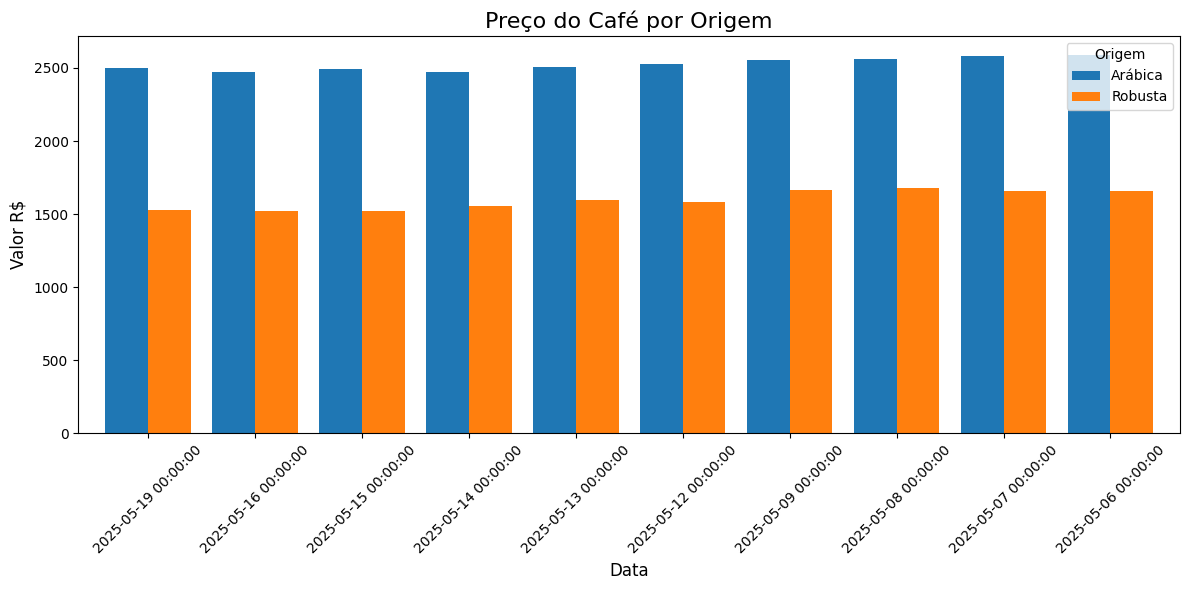

In [ ]:
#Leonardo
plt.figure(figsize=(12, 6)) #Criação do gráfico 12/6
tabela_pivot.plot(kind='bar', width=0.8, ax=plt.gca()) #Gráfico de barras

plt.title('Preço do Café por Origem', fontsize=16)
plt.xlabel('Data', fontsize=12) #Eixo X
plt.ylabel('Valor R$', fontsize=12) #Eixo Y
plt.xticks(rotation=45)
plt.legend(title='Origem')

plt.tight_layout()
plt.show() #Exibe

In [ ]:
#Leonardo
# Extração dos dados do arroz com casca
def extrair_dados_arroz(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'} # Define cabeçalho para simular navegador
        response = requests.get(url, headers=headers)

        if response.status_code != 200: # Verifica requisição
            raise Exception(f"Falha na requisição: status {response.status_code}")
        soup = BeautifulSoup(response.text, 'html.parser')

        # Busca tabelas com classe 'cot-fisicas'
        tabelas = soup.find_all('table', class_='cot-fisicas')
        if not tabelas:
            raise Exception("Nenhuma tabela com classe 'cot-fisicas' encontrada")

        lista_df = [] # Lista para armazenar dataframe
        for tabela in tabelas:
            df = pd.read_html(StringIO(str(tabela)))[0]
            lista_df.append(df)

        df_arroz = pd.concat(lista_df, ignore_index=True) # Concatena os dataframes

        print("Colunas encontradas no DataFrame de arroz:", df_arroz.columns.tolist()) # Colunas e tipos de dados buscados
        print("Tipos de dados no DataFrame de arroz:")
        print(df_arroz.dtypes)

        if 'Valor R$/ Saca de 50 kg' in df_arroz.columns:
            df_arroz = df_arroz.rename(columns={'Valor R$/ Saca de 50 kg': 'Valor R$'}) # Renomeia coluna
        else:
            raise Exception("Coluna 'Valor R$/ Saca de 50 kg' não encontrada")

        if 'Variação (%)' in df_arroz.columns:
            df_arroz = df_arroz.rename(columns={'Variação (%)': 'Variação(%)'}) # Renomeia coluna
        else:
            raise Exception("Coluna 'Variação (%)' não encontrada")

        df_arroz['Valor R$'] = df_arroz['Valor R$'].astype(str) # Valor R$ para string
        df_arroz = df_arroz[df_arroz['Valor R$'].str.match(r'^-?\d*[,.\d]*$', na=False)] # Valida valor R$ nao numerico

        df_arroz['Valor R$'] = ( # Tratamento de pontuação
            df_arroz['Valor R$']
            .str.replace('.', '', regex=False)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )


        df_arroz['Variação(%)'] = ( # Trata Variação
            df_arroz['Variação(%)'].astype(str)
            .str.replace('%', '', regex=False)
            .str.replace(',', '.', regex=False)
            .str.replace('+', '', regex=False)
        )
        df_arroz['Variação(%)'] = pd.to_numeric(df_arroz['Variação(%)'], errors='coerce')

        if 'Data' in df_arroz.columns: # Data para datetime, seguir o padrão café
            df_arroz['Data'] = pd.to_datetime(df_arroz['Data'], dayfirst=True, errors='coerce')
        else:
            raise Exception("Coluna 'Data' não encontrada")
        return df_arroz

    except Exception as e:
        print(f"Erro ao extrair dados de Arroz: {e}")
        return pd.DataFrame()

In [ ]:
#Leonardo
url_arroz = 'https://www.noticiasagricolas.com.br/cotacoes/arroz/arroz-em-casca-esalq-bbm' # Busca dados url_arroz
dados_arroz = extrair_dados_arroz(url_arroz) # Faz a extração
dados_arroz['Origem'] = 'Arroz' # Seta o 'Arroz' como padrão
df_comparado_arroz = dados_arroz.copy() # Cria df_comparado_arroz para preservar o dados_arroz

Colunas encontradas no DataFrame de arroz: ['Data', 'Valor R$/ Saca de 50 kg', 'Variação (%)']
Tipos de dados no DataFrame de arroz:
Data                       object
Valor R$/ Saca de 50 kg     int64
Variação (%)               object
dtype: object


In [ ]:
#Vinicius
if not df_comparado_arroz.empty and 'Data' in df_comparado_arroz.columns: # Verifica se o DataFrame está vazio
    # Gráfico 1: Preços do arroz por data
    df_arroz_comparado = df_comparado_arroz.copy() # Cópia para preservar df_comparado_arroz
    df_arroz_comparado['Data'] = pd.to_datetime(df_arroz_comparado['Data'], dayfirst=True) # Converte da ta para datetime
    plt.figure(figsize=(12, 6)) # Gráfico 12/6
    for origem in df_arroz_comparado['Origem'].unique(): # Se houver origens diferentes, gera uma linha nova
        dados = df_arroz_comparado[df_arroz_comparado['Origem'] == origem] # Filtra dado da origem(Arroz)
        plt.plot(dados['Data'], dados['Valor R$'], label=origem, color='green')

    plt.xlabel('Data') # Eixo X
    plt.ylabel('Preço do Arroz (R$)') # Eixo Y
    plt.title('Preços do Arroz')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('precos_arroz.png')
    plt.close()

    tabela_pivot_arroz = df_arroz_comparado.pivot_table(
        index='Data',
        columns='Origem',
        values='Valor R$',
    )
    tabela_pivot_arroz = tabela_pivot_arroz.sort_index(ascending=False) # Ordena decrescente
    print("Tabela pivotada dos preços do arroz:")
    print(tabela_pivot_arroz.head(10)) # Exibe os 10 primeiros dados
else:
    print("Nenhum dado de arroz ou coluna 'Data' não encontrada para gerar gráficos/tabela.") # Exception

Tabela pivotada dos preços do arroz:
Origem       Arroz
Data              
2025-05-19  7426.0
2025-05-16  7431.0
2025-05-15  7461.0
2025-05-14  7475.0
2025-05-13  7478.0
2025-05-12  7502.0
2025-05-09  7498.0
2025-05-08  7515.0
2025-05-07  7510.0
2025-05-06  7537.0


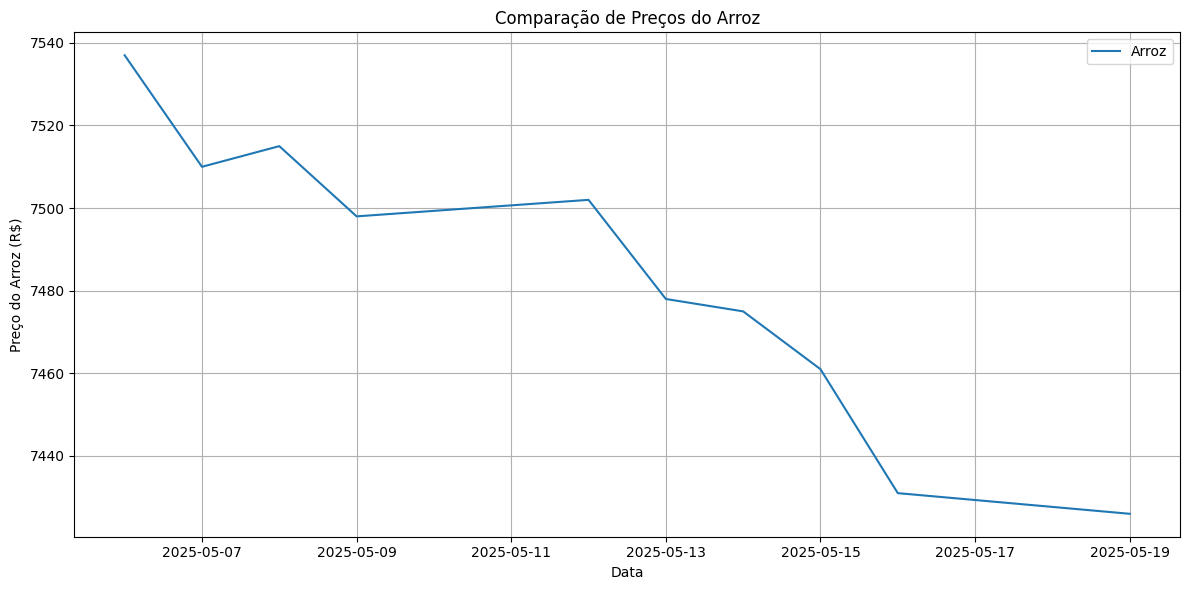

In [ ]:
#Vinicius
df_arroz_comparado['Data'] = pd.to_datetime(df_arroz_comparado['Data'], dayfirst=True) # Conversão date to datetime
plt.figure(figsize=(12, 6)) # Grafico 12/6
for origem in df_arroz_comparado['Origem'].unique(): # Diferencia origem
    dados = df_arroz_comparado[df_arroz_comparado['Origem'] == origem] # Filtro da origem
    plt.plot(dados['Data'], dados['Valor R$'], label=origem) # Plotagem

plt.xlabel('Data') # Eixo X
plt.ylabel('Preço do Arroz (R$)') # Eixo Y
plt.title('Comparação de Preços do Arroz')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() # Exibe